In [1]:
import keras
keras.__version__

'2.4.3'

In [2]:
import os, shutil

In [3]:
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = '/Users/xmh/AI_mask/mask_data'

# Directories for our training,
# validation and test splits
train_dir = os.path.join(original_dataset_dir, 'train')
validation_dir = os.path.join(original_dataset_dir, 'validation')
test_dir = os.path.join(original_dataset_dir, 'test')

# Directory with our training mask pictures
train_mask_dir = os.path.join(train_dir, 'mask')

# Directory with our training no_mask pictures
train_no_mask_dir = os.path.join(train_dir, 'no_mask')

# Directory with our validation mask pictures
validation_mask_dir = os.path.join(validation_dir, 'mask')

# Directory with our validation no_mask pictures
validation_no_mask_dir = os.path.join(validation_dir, 'no_mask')

# Directory with our validation mask pictures
test_mask_dir = os.path.join(test_dir, 'mask')

# Directory with our validation no_mask pictures
test_no_mask_dir = os.path.join(test_dir, 'no_mask')




## Dropout

In [7]:
from keras import layers
from keras import models

#add Dropout layer 
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [8]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=16,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=16,
        class_mode='binary')

Found 320 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [8]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [9]:
history = model.fit_generator(
      train_generator,
      epochs = 30,
      validation_data=validation_generator,
      validation_steps=4)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
32/32 [==============================] - 17s 543ms/step - loss: 0.6949 - acc: 0.5312 - val_loss: 0.7171 - val_acc: 0.4500
Epoch 2/30
32/32 [==============================] - 17s 536ms/step - loss: 0.6685 - acc: 0.5750 - val_loss: 0.7198 - val_acc: 0.4250
Epoch 3/30
32/32 [==============================] - 17s 535ms/step - loss: 0.6166 - acc: 0.6812 - val_loss: 0.6057 - val_acc: 0.6500
Epoch 4/30
32/32 [==============================] - 18s 566ms/step - loss: 0.5965 - acc: 0.6687 - val_loss: 0.6021 - val_acc: 0.6250
Epoch 5/30
32/32 [==============================] - 17s 539ms/step - loss: 0.5616 - acc: 0.7312 - val_loss: 0.6236 - val_acc: 0.6750
Epoch 6/30
32/32 [==============================] - 18s 567ms/step - loss: 0.5263 - acc: 0.7344 - val_loss: 0.6698 - val_acc: 0.7000
Epoch 7/30
32/32 [==============================] - 18s 572ms/step - loss: 0.4994 - acc: 0.7437 - val_loss: 0.6049 - val_acc: 

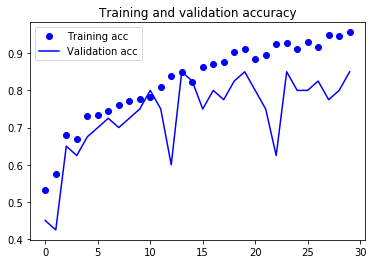

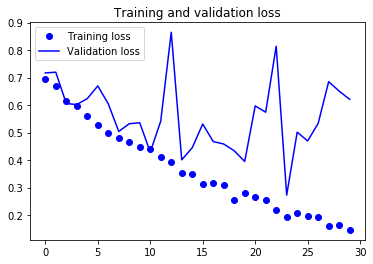

In [10]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Decrease overfitting. Increase validation acc.

## Learning Rate

In [4]:
from keras import layers
from keras import models

#add Dropout layer 
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))



In [5]:
from keras import optimizers

#Increase Learning rate for 10 times
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-3),
              metrics=['acc'])

In [9]:
history = model.fit_generator(
      train_generator,
      epochs = 100,
      validation_data=validation_generator,
      validation_steps=4)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
20/20 [==============================] - 22s 1s/step - loss: 0.9575 - acc: 0.4656 - val_loss: 0.6829 - val_acc: 0.5938
Epoch 2/100
20/20 [==============================] - 21s 1s/step - loss: 0.6898 - acc: 0.5531 - val_loss: 0.6854 - val_acc: 0.5312
Epoch 3/100
20/20 [==============================] - 22s 1s/step - loss: 0.6978 - acc: 0.5437 - val_loss: 0.6756 - val_acc: 0.6250
Epoch 4/100
20/20 [==============================] - 23s 1s/step - loss: 0.6758 - acc: 0.5875 - val_loss: 0.6776 - val_acc: 0.5469
Epoch 5/100
20/20 [==============================] - 23s 1s/step - loss: 0.6810 - acc: 0.5969 - val_loss: 0.6466 - val_acc: 0.6250
Epoch 6/100
20/20 [==============================] - 24s 1s/step - loss: 0.6786 - acc: 0.6281 - val_loss: 0.6423 - val_acc: 0.6250
Epoch 7/100
20/20 [==============================] - 23s 1s/step - loss: 0.6360 - acc: 0.6500 - val_loss: 0.6145 - val_acc: 0.6719
Epoch 8

20/20 [==============================] - 21s 1s/step - loss: 0.3752 - acc: 0.8313 - val_loss: 0.9532 - val_acc: 0.6875
Epoch 62/100
20/20 [==============================] - 20s 1s/step - loss: 0.3450 - acc: 0.8719 - val_loss: 0.4941 - val_acc: 0.7500
Epoch 63/100
20/20 [==============================] - 21s 1s/step - loss: 0.3567 - acc: 0.8438 - val_loss: 0.5897 - val_acc: 0.7344
Epoch 64/100
20/20 [==============================] - 20s 1s/step - loss: 0.3451 - acc: 0.8344 - val_loss: 0.4636 - val_acc: 0.7969
Epoch 65/100
20/20 [==============================] - 21s 1s/step - loss: 0.4715 - acc: 0.8031 - val_loss: 0.4707 - val_acc: 0.7500
Epoch 66/100
20/20 [==============================] - 21s 1s/step - loss: 0.3100 - acc: 0.8687 - val_loss: 0.6638 - val_acc: 0.7344
Epoch 67/100
20/20 [==============================] - 19s 963ms/step - loss: 0.4189 - acc: 0.8375 - val_loss: 0.5906 - val_acc: 0.7812
Epoch 68/100
20/20 [==============================] - 19s 966ms/step - loss: 0.3641 - 

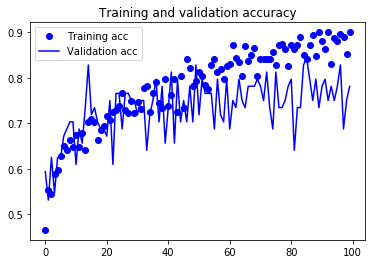

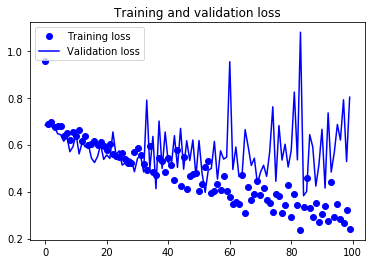

In [11]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Large Learning Rate would cause loss increase after some tranning.

## Learning Rate Annealing

In [19]:
from keras import layers
from keras import models

#add Dropout layer 
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [20]:
from keras import optimizers

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=1000,
    decay_rate=0.9)


#Increase Learning rate for 5 times
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-3, decay = 0.2),
              metrics=['acc'])


In [21]:
history = model.fit_generator(
      train_generator,
      epochs = 100,
      validation_data=validation_generator,
      validation_steps=4)

Epoch 1/100
20/20 [==============================] - 21s 1s/step - loss: 1.2564 - acc: 0.5437 - val_loss: 0.6850 - val_acc: 0.5156
Epoch 2/100
20/20 [==============================] - 20s 1s/step - loss: 0.6878 - acc: 0.5219 - val_loss: 0.6652 - val_acc: 0.6250
Epoch 3/100
20/20 [==============================] - 21s 1s/step - loss: 0.6689 - acc: 0.6187 - val_loss: 0.6478 - val_acc: 0.6094
Epoch 4/100
20/20 [==============================] - 21s 1s/step - loss: 0.6572 - acc: 0.6344 - val_loss: 0.6373 - val_acc: 0.6250
Epoch 5/100
20/20 [==============================] - 22s 1s/step - loss: 0.6437 - acc: 0.6750 - val_loss: 0.6542 - val_acc: 0.5938
Epoch 6/100
20/20 [==============================] - 22s 1s/step - loss: 0.6394 - acc: 0.6625 - val_loss: 0.6606 - val_acc: 0.5938
Epoch 7/100
20/20 [==============================] - 23s 1s/step - loss: 0.6227 - acc: 0.6875 - val_loss: 0.6516 - val_acc: 0.6094
Epoch 8/100
20/20 [==============================] - 25s 1s/step - loss: 0.6155 - a

20/20 [==============================] - 21s 1s/step - loss: 0.5788 - acc: 0.7344 - val_loss: 0.5845 - val_acc: 0.6875
Epoch 64/100
20/20 [==============================] - 21s 1s/step - loss: 0.5840 - acc: 0.7000 - val_loss: 0.5998 - val_acc: 0.6562
Epoch 65/100
20/20 [==============================] - 21s 1s/step - loss: 0.5775 - acc: 0.6875 - val_loss: 0.6078 - val_acc: 0.6719
Epoch 66/100
20/20 [==============================] - 23s 1s/step - loss: 0.5775 - acc: 0.7063 - val_loss: 0.5847 - val_acc: 0.6875
Epoch 67/100
20/20 [==============================] - 21s 1s/step - loss: 0.5885 - acc: 0.6687 - val_loss: 0.6045 - val_acc: 0.6719
Epoch 68/100
20/20 [==============================] - 21s 1s/step - loss: 0.5871 - acc: 0.7031 - val_loss: 0.5950 - val_acc: 0.6562
Epoch 69/100
20/20 [==============================] - 21s 1s/step - loss: 0.5845 - acc: 0.6844 - val_loss: 0.5738 - val_acc: 0.6719
Epoch 70/100
20/20 [==============================] - 21s 1s/step - loss: 0.5790 - acc: 0

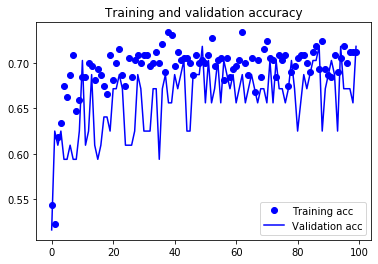

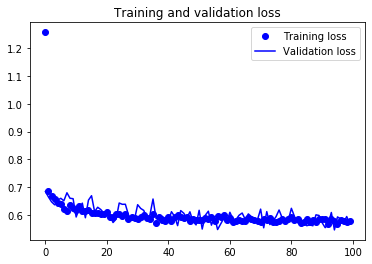

In [22]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Use Adam Optimizor

In [38]:
from keras import layers
from keras import models

#add Dropout layer 
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))



In [39]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])

In [40]:
history = model.fit_generator(
      train_generator,
      epochs = 50,
      validation_data=validation_generator,
      validation_steps=4)

Epoch 1/50
20/20 [==============================] - 24s 1s/step - loss: 0.7110 - acc: 0.4875 - val_loss: 0.6912 - val_acc: 0.4844
Epoch 2/50
20/20 [==============================] - 21s 1s/step - loss: 0.6970 - acc: 0.4875 - val_loss: 0.6830 - val_acc: 0.5312
Epoch 3/50
20/20 [==============================] - 23s 1s/step - loss: 0.6822 - acc: 0.6313 - val_loss: 0.6619 - val_acc: 0.6719
Epoch 4/50
20/20 [==============================] - 22s 1s/step - loss: 0.6604 - acc: 0.6281 - val_loss: 0.6416 - val_acc: 0.6094
Epoch 5/50
20/20 [==============================] - 22s 1s/step - loss: 0.6628 - acc: 0.6156 - val_loss: 0.5840 - val_acc: 0.7500
Epoch 6/50
20/20 [==============================] - 21s 1s/step - loss: 0.6564 - acc: 0.6281 - val_loss: 0.6321 - val_acc: 0.5938
Epoch 7/50
20/20 [==============================] - 25s 1s/step - loss: 0.6349 - acc: 0.6562 - val_loss: 0.6221 - val_acc: 0.6719
Epoch 8/50
20/20 [==============================] - 29s 1s/step - loss: 0.6050 - acc: 0.69

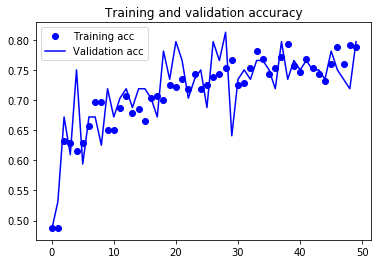

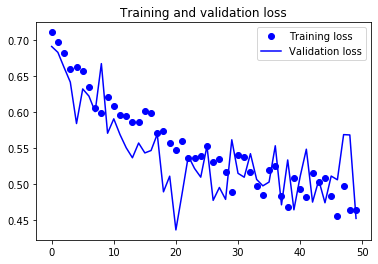

In [41]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()